In [3]:
import requests
import pandas as pd

from io import BytesIO



resp = requests.get("https://github.com/tciodaro/eng_ml/blob/main/data/dataset_kobe_dev.parquet?raw=true")

file_like_object = BytesIO(resp.content)


df = pd.read_parquet(file_like_object)


df



,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30692
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695


In [4]:

#Primeiro verificar se tem nulos
print("Dados faltantes:")
print(df.isna().sum())

#Depois verificar se tem duplicados
print("Dados duplicados:")
print(df.duplicated().sum())


print("Verificando os tipos de cada atributo:")
print(df.dtypes)


filtered =  df.dropna()[['lat','lon','minutes_remaining','period','playoffs','shot_distance', 'shot_made_flag']]


filtered

Dados faltantes:
action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        3986
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64
Dados duplicados:
0
Verificando os tipos de cada atributo:
action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   floa

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,0.0
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30694,33.8783,-118.4038,3,4,1,21,1.0


In [4]:
from sklearn.model_selection import train_test_split

y = filtered[['shot_made_flag']]

data_train, data_test =  train_test_split(filtered, test_size=0.2, stratify=y, random_state=22)



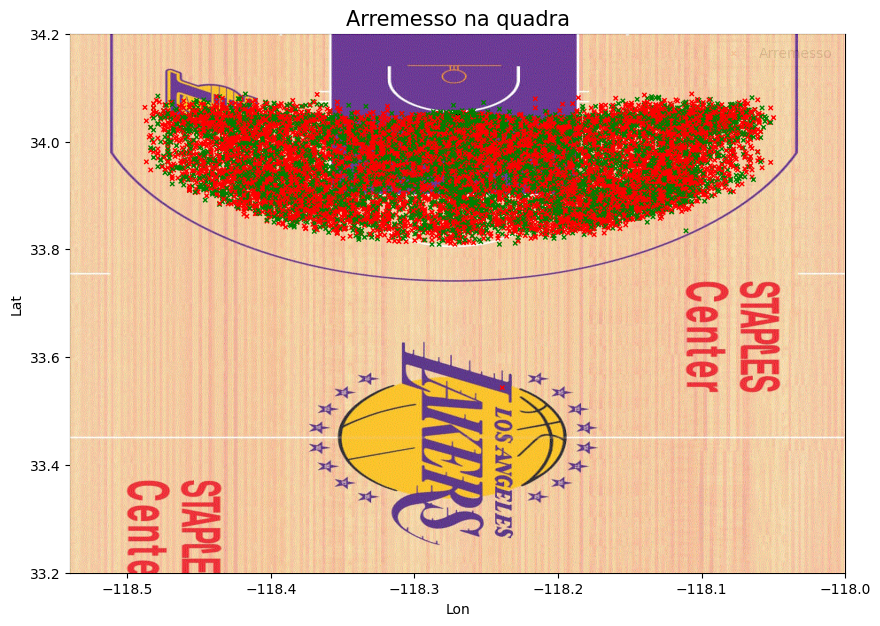

In [12]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

current_path = os.path.dirname(os.getcwd())

lat= filtered['lat']
lon= filtered['lon']
shots = filtered['shot_made_flag']

color = ["green" if shot == 1 else "red" for shot in shots]

fig, ax = plt.subplots(figsize=(10, 7))

image = mpimg.imread(current_path+"/streamlit/lakers.gif")


ax.imshow(image, extent=[-118.54, -118 ,33.2, 34.2], aspect='auto', alpha=0.9,zorder=9)  

ax.scatter(lon, lat,s=10, c=color,marker='x' ,alpha=1, label='Arremesso',zorder=10, linewidths=1)
plt.ticklabel_format(style="plain", axis="both",useOffset=False)
plt.title('Arremesso na quadra', fontsize=15)
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.legend(loc="upper right")
plt.show()